
# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


/content/drive/MyDrive/concrete_data.csv

https://github.com/AmmarBinTahir/piaic_q2_Assignments/blob/master/concrete_data.csv


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers , optimizers

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/concrete_data.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [ ]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.keys()# to gets columns name

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [ ]:
# split dataframe into input and output
data=df.iloc[:,:8]

targets=df.iloc[:,-1]

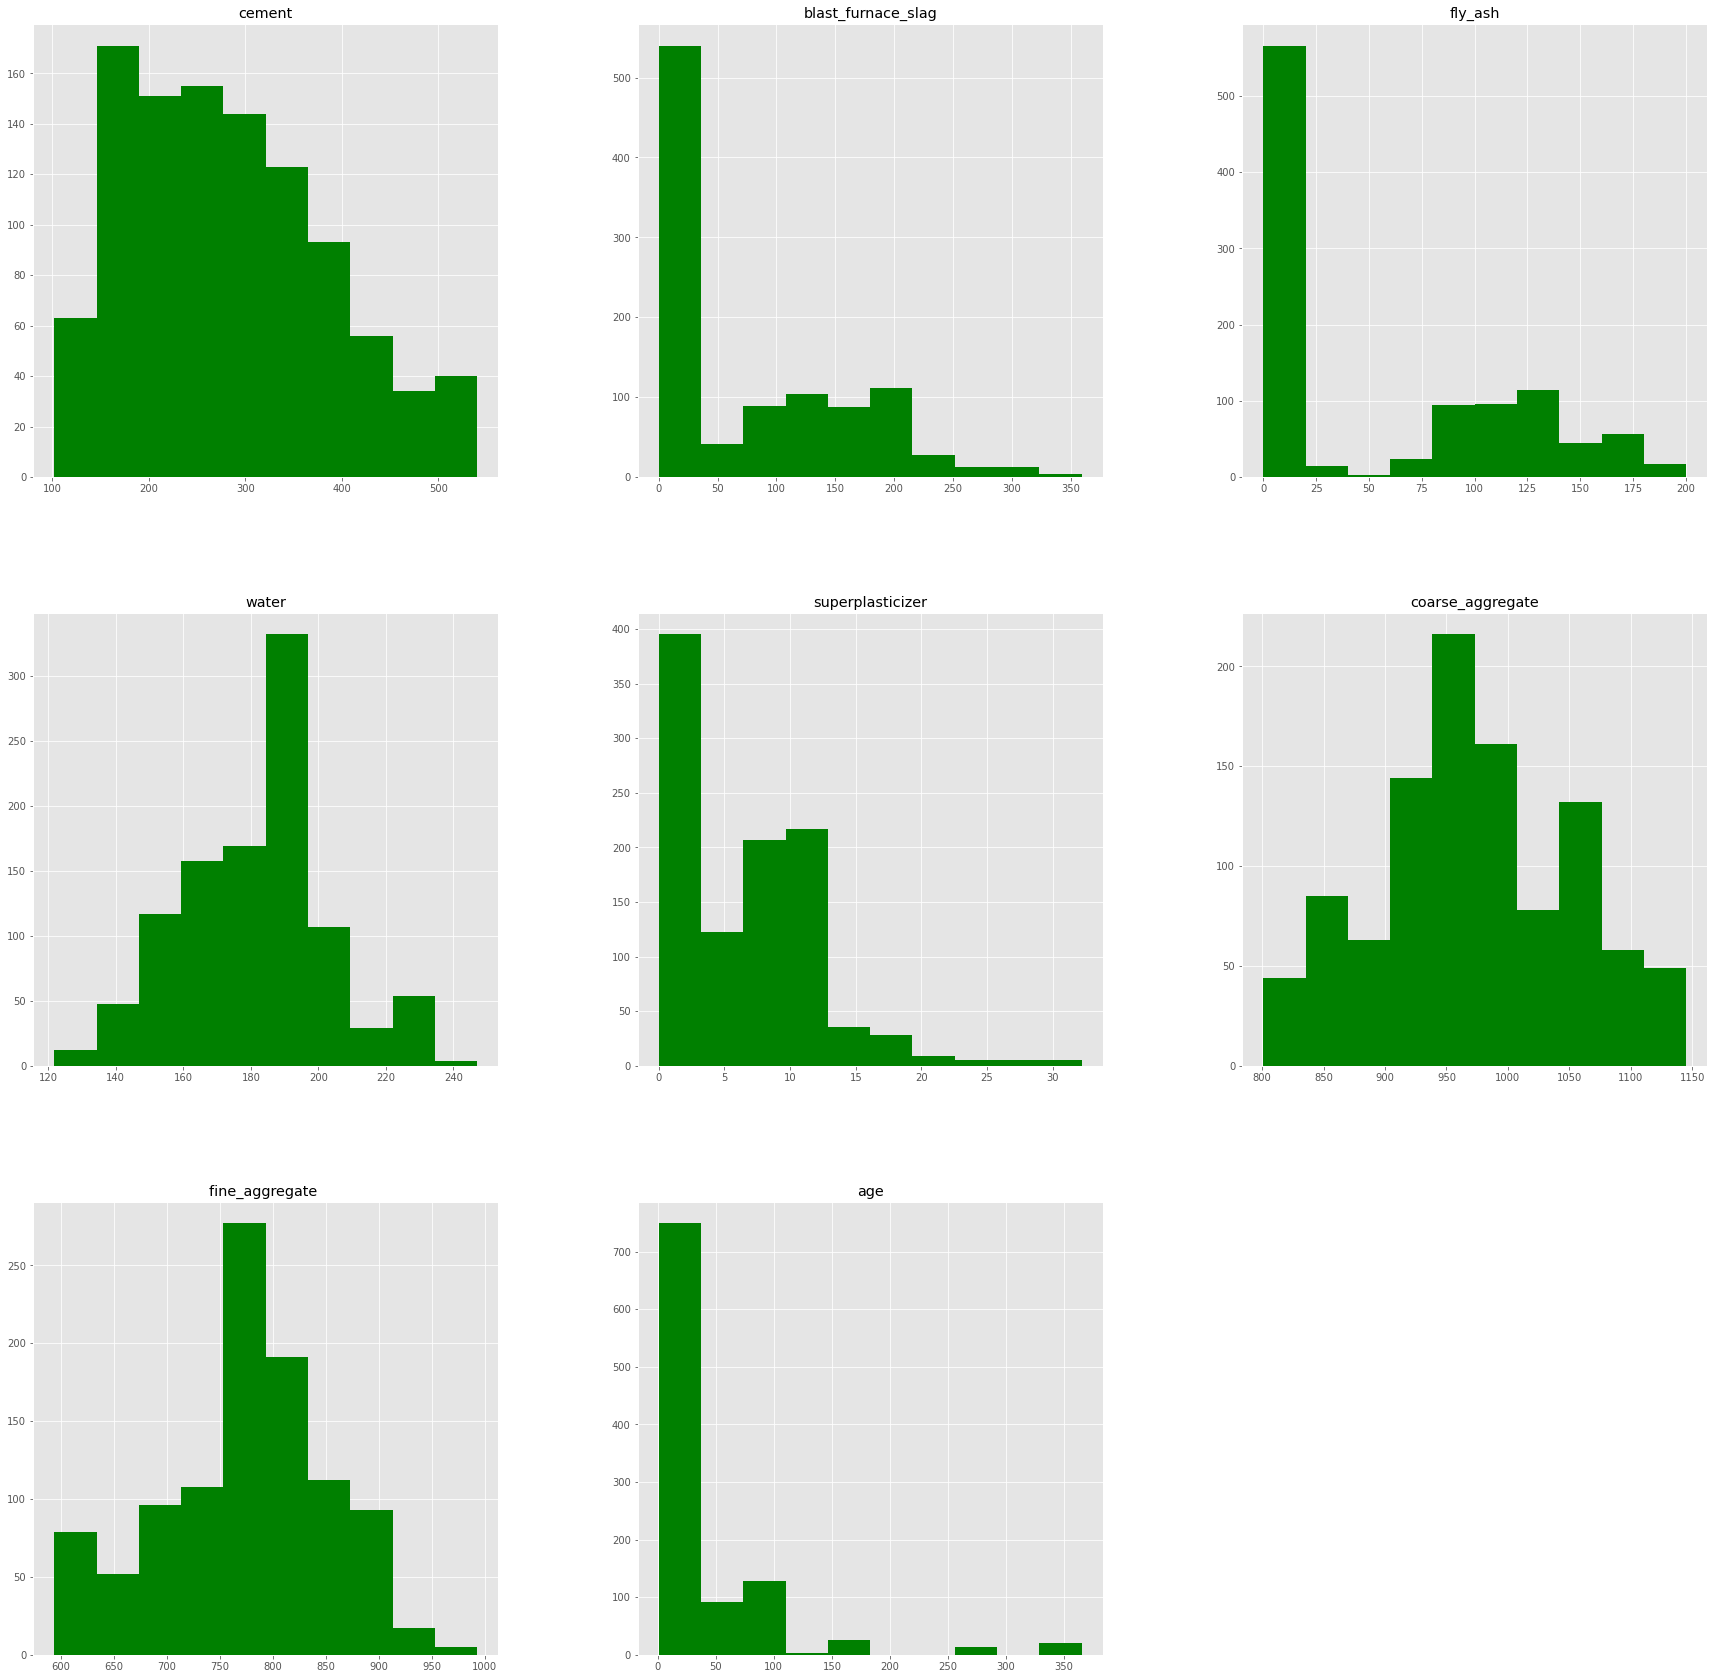

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.DataFrame.hist(data, figsize = [30,30], color="Green")
plt.show()

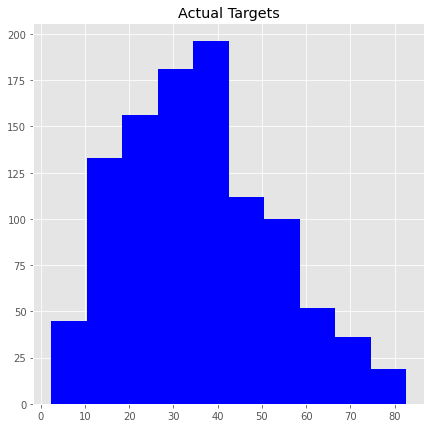

In [ ]:
plt.style.use('ggplot')
targets.hist( figsize = [7,7], color="Blue")
plt.title("Actual Targets")
plt.show()

In [ ]:
# standardized or normalized the data (input variables)
mean = data.mean(axis=0)
data-= mean
std = data.std(axis=0)
data/= std

In [ ]:
# data spliting using machine learning spliting method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,targets,random_state=0)

In [ ]:
print(f"Shape of training data :{X_train.shape},\nShape of training targets:{y_train.shape}")

Shape of training data :(772, 8),
Shape of training targets:(772,)


In [ ]:
print(f"Shape of testing data :{X_test.shape},\nShape of testing targets:{y_test.shape}")

Shape of testing data :(258, 8),
Shape of testing targets:(258,)


In [ ]:
X_train= np.asarray(X_train).astype('float32')
X_test= np.asarray(X_test).astype('float32')

In [ ]:
val_X = X_train[:230]
partial_X_train=X_train[230:]
val_y=y_train[:230]
partial_y_train=y_train[230:]

In [ ]:
from keras import models, layers , optimizers

In [ ]:
network=models.Sequential()
network.add(tf.keras.layers.Dense(10,activation="relu",input_shape=(X_train.shape[1],)))
network.add(tf.keras.layers.Dense(8,activation="relu"))
network.add(tf.keras.layers.Dense(1))

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="mse",metrics=['mae'])

In [ ]:
history=network.fit(partial_X_train,partial_y_train,epochs=10,validation_data=(val_X,val_y),batch_size=1,verbose=1)

Epoch 1/10
542/542 [==============================] - 1s 2ms/step - loss: 147.0561 - mae: 9.3300 - val_loss: 133.8916 - val_mae: 9.2281
Epoch 2/10
542/542 [==============================] - 1s 1ms/step - loss: 141.6747 - mae: 9.2476 - val_loss: 132.5824 - val_mae: 9.1831
Epoch 3/10
542/542 [==============================] - 1s 1ms/step - loss: 142.8867 - mae: 9.2103 - val_loss: 130.6341 - val_mae: 9.0880
Epoch 4/10
542/542 [==============================] - 1s 1ms/step - loss: 137.4466 - mae: 9.1498 - val_loss: 129.0211 - val_mae: 9.1012
Epoch 5/10
542/542 [==============================] - 1s 1ms/step - loss: 139.6582 - mae: 9.0933 - val_loss: 127.9618 - val_mae: 9.0420
Epoch 6/10
542/542 [==============================] - 1s 1ms/step - loss: 134.7249 - mae: 9.0207 - val_loss: 124.4718 - val_mae: 8.9530
Epoch 7/10
542/542 [==============================] - 1s 1ms/step - loss: 134.1787 - mae: 8.9709 - val_loss: 124.6728 - val_mae: 8.9381
Epoch 8/10
542/542 [============================

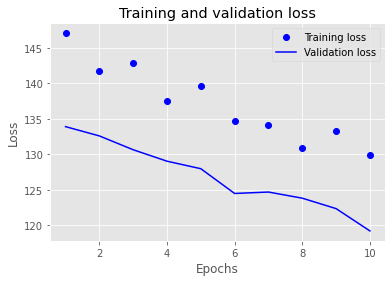

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
all_mae_histories=[]
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)
print(all_mae_histories)

[[9.22811508178711, 9.183130264282227, 9.088048934936523, 9.10116958618164, 9.042040824890137, 8.953041076660156, 8.938065528869629, 8.843764305114746, 8.871981620788574, 8.7754487991333]]


In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(2)]
print(average_mae_history)

[9.22811508178711, 9.183130264282227]


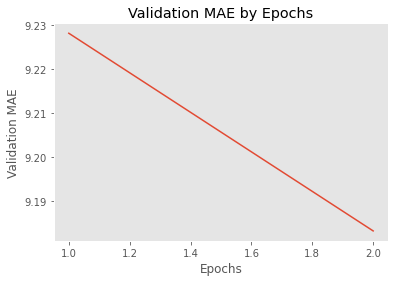

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE by Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid()
plt.show()

In [ ]:
test_mse_score, test_mae_score = network.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 110.8628 - mae: 8.3931


In [ ]:
 test_mae_score

9.017193794250488

In [ ]:
y_pred = network.predict(X_test)
y_pred

array([[41.403885 ],
       [15.057683 ],
       [61.415867 ],
       [47.419666 ],
       [20.609257 ],
       [52.049343 ],
       [43.900524 ],
       [27.384548 ],
       [53.321682 ],
       [37.724503 ],
       [17.532589 ],
       [42.48903  ],
       [24.964596 ],
       [28.776947 ],
       [45.1639   ],
       [55.615738 ],
       [33.848297 ],
       [25.466053 ],
       [51.537945 ],
       [30.873657 ],
       [51.636158 ],
       [33.139034 ],
       [29.284733 ],
       [51.1859   ],
       [22.183262 ],
       [21.975117 ],
       [74.1909   ],
       [26.292625 ],
       [55.615738 ],
       [49.476463 ],
       [18.679893 ],
       [33.24259  ],
       [14.568461 ],
       [22.243172 ],
       [24.325409 ],
       [10.830653 ],
       [51.344532 ],
       [25.572811 ],
       [24.74131  ],
       [24.880375 ],
       [45.449715 ],
       [26.880077 ],
       [23.708618 ],
       [31.393707 ],
       [57.220104 ],
       [49.3122   ],
       [28.627747 ],
       [45.66

In [ ]:
y_test

747    26.06
718    10.35
175    79.30
828    74.99
713     9.69
       ...  
453    31.72
906    39.42
757    18.13
875    18.28
62      9.87
Name: concrete_compressive_strength, Length: 258, dtype: float64

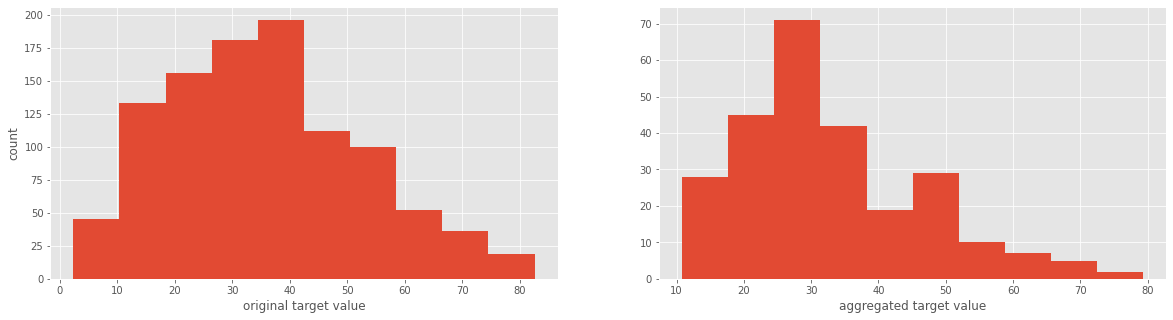

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(targets)
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y_pred)
plt.xlabel('aggregated target value')
plt.show()